# E-commerce Clothing Campaign Analysis

This project focuses on analyzing data from a clothing e-commerce campaign over a 12-month period. The aim is to gain insights into the campaign's performance and effectiveness by evaluating key metrics such as:

- **Monthly Clicks**: The number of times users clicked on ads.
- **Monthly Impressions**: The total number of times the ads were shown.
- **Monthly Conversion Rate**: The percentage of clicks that led to sales or other desired actions.
- **Click-Through Rate (CTR)**: The ratio of clicks to impressions, indicating ad engagement.
- **Cost Per Click (CPC)**: The average amount spent for each click.

By analyzing these metrics, the project will provide a comprehensive view of the campaign's efficiency and suggest potential improvements for future performance.


In [1]:
# Import necessary libraries
import numpy as np          # For numerical operations and handling arrays
import pandas as pd         # For data manipulation and analysis
import matplotlib.pyplot as plt   # For creating visualizations (plots, graphs, etc.)
import seaborn as sns       # For enhanced data visualizations (based on matplotlib)
import calendar             # For working with calendar-related data (e.g., months)


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("Conversion Rate.csv")  # Load the CSV file with campaign data

# Display the basic info of the DataFrame
print(df.info())  # Shows a summary of the DataFrame including data types, non-null entries, and memory usage

print('\n')  # Print a blank line for readability between outputs

# Check for missing values
print(df.isna().sum())  # Prints the total number of missing values (NaNs) for each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Day                       365 non-null    object
 1   Impressions               365 non-null    int64 
 2   Clicks                    365 non-null    int64 
 3   CTR (Click Through Rate)  365 non-null    object
 4   CPC (cost per click)      365 non-null    object
 5   Spend                     365 non-null    object
 6   Conversions               365 non-null    int64 
 7   Conversion rate           365 non-null    object
dtypes: int64(3), object(5)
memory usage: 22.9+ KB
None


Day                         0
Impressions                 0
Clicks                      0
CTR (Click Through Rate)    0
CPC (cost per click)        0
Spend                       0
Conversions                 0
Conversion rate             0
dtype: int64


In [3]:
df  # First look at the DataFrame to get a sense of the data structure and values

,Day,Impressions,Clicks,CTR (Click Through Rate),CPC (cost per click),Spend,Conversions,Conversion rate
0,01-Jan-2019,172375,2559,1.48%,€0.35,€890.18,114,4.5%
1,02-Jan-2019,190658,2505,1.31%,€0.36,€890.08,102,4.1%
2,03-Jan-2019,208326,2701,1.30%,€0.33,€884.63,97,3.6%
3,04-Jan-2019,200436,2701,1.35%,€0.31,€848.98,97,3.6%
4,05-Jan-2019,218614,2848,1.30%,€0.31,€886.30,93,3.3%
...,...,...,...,...,...,...,...,...
360,27-Dec-2019,506537,5934,1.17%,€0.44,"€2,584.20",195,3.3%
361,28-Dec-2019,490630,6043,1.23%,€0.41,"€2,481.71",247,4.1%
362,29-Dec-2019,475778,5956,1.25%,€0.42,"€2,494.15",245,4.1%
363,30-Dec-2019,227646,3137,1.38%,€0.39,"€1,233.51",125,4.0%


In [4]:
# Data Cleaning and Processing

# Convert 'Day' column to datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%d-%b-%Y')  # Convert 'Day' column to datetime object

# Extract 'Month' from 'Day' and create a new 'Month' column (keeping only the year-month period)
df['Month'] = df['Day'].dt.to_period('M')  # Convert the 'Day' column to a monthly period (YYYY-MM)

# Drop the 'Day' column as it's no longer needed after extracting 'Month'
df = df.drop('Day', axis=1)

# Convert 'CTR (Click Through Rate)' from percentage string to a decimal number
df['CTR (Click Through Rate)'] = df['CTR (Click Through Rate)'].str.rstrip('%').astype(float) / 100

# Convert 'Conversion rate' from percentage string to a decimal number
df['Conversion rate'] = df['Conversion rate'].str.rstrip('%').astype(float) / 100

# Convert 'CPC (cost per click)' from a string with a currency symbol to a numeric value
df['CPC (cost per click)'] = df['CPC (cost per click)'].str.lstrip('€').astype(float)

# Clean and convert 'Spend' from a string with currency and commas to a numeric value
df['Spend'] = (
    df['Spend']
    .str.lstrip('€')  # Remove '€' symbol from 'Spend'
    .str.replace(',', '', regex=False)  # Remove commas for proper conversion
    .apply(pd.to_numeric, errors='coerce')  # Convert to numeric, converting any errors to NaN
)

# Function to convert 'Month' period to full month name
def month_number_to_name(month_str):
    year, month = map(int, str(month_str).split('-'))  # Split 'Month' period (YYYY-MM) into year and month
    return calendar.month_name[month]  # Return full month name (e.g., 'January')

# Group data by 'Month' and calculate the sum for each month
grouped_df = df.groupby('Month').sum().reset_index()

# Convert 'Month' period to its corresponding full month name
grouped_df['Month'] = grouped_df['Month'].astype(str).apply(month_number_to_name)


In [5]:
# Calculating metrics based on group-by aggregation

# Calculate 'Conversion rate' as the ratio of conversions to clicks, multiplied by 100 to get percentage
grouped_df['Conversion rate'] = (grouped_df['Conversions'] / grouped_df['Clicks']) * 100

# Calculate 'CTR (Click Through Rate)' as the ratio of clicks to impressions, multiplied by 100 to get percentage
grouped_df['CTR (Click Through Rate)'] = (grouped_df['Clicks'] / grouped_df['Impressions']) * 100

# Calculate 'CPC (cost per click)' as the ratio of spend to clicks
grouped_df['CPC (cost per click)'] = grouped_df['Spend'] / grouped_df['Clicks']


In [6]:
# Looking at the final, processed, and cleaned dataset after applying all transformations and calculations
# Notes: The rates in this dataset (Conversion rate and CTR) are percentages, and Spend and CPC are in euros.
grouped_df


,Month,Impressions,Clicks,CTR (Click Through Rate),CPC (cost per click),Spend,Conversions,Conversion rate
0,January,7449471,97299,1.306120,0.310060,30168.53,3168,3.255943
1,February,5332942,78585,1.473577,0.261621,20559.50,2886,3.672457
2,March,8959506,123562,1.379116,0.295752,36543.67,3823,3.093993
3,April,8310485,115084,1.384805,0.295534,34011.28,4024,3.496576
4,May,10803721,145533,1.347064,0.303066,44106.05,5214,3.582693
5,June,10723592,145325,1.355190,0.298622,43397.29,5537,3.810081
6,July,10329504,145753,1.411036,0.299841,43702.72,6032,4.138508
7,August,11952693,162165,1.356724,0.275297,44643.47,4371,2.695403
8,September,10166296,143417,1.410710,0.280362,40208.65,4902,3.418005
9,October,16132193,314555,1.949859,0.210302,66151.42,7147,2.272099


In [7]:
# Generating summary statistics for the final dataset to understand the distribution and range of the numerical columns
# Notes: The rates in this dataset (Conversion rate and CTR) are percentages, and Spend and CPC are in euros.
grouped_df.describe()


,Impressions,Clicks,CTR (Click Through Rate),CPC (cost per click),Spend,Conversions,Conversion rate
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.013345e+07,150958.166667,1.461129,0.295034,43520.609167,5418.750000,3.681388
std,2.634395e+06,59580.426552,0.186976,0.042664,13056.150374,2041.494155,0.982570
min,5.332942e+06,78585.000000,1.306120,0.210302,20559.500000,2886.000000,2.272099
25%,8.797251e+06,121442.500000,1.356340,0.279096,35910.572500,3973.750000,3.215456
50%,1.025819e+07,145429.000000,1.397758,0.297187,43550.005000,5058.000000,3.539634
75%,1.091633e+07,150334.500000,1.446186,0.304814,48028.505000,6310.750000,3.892188
max,1.613219e+07,314555.000000,1.949859,0.397453,66151.420000,8978.000000,6.108982


In [8]:
# Preprocessing phase is complete. Now, moving on to the data visualization phase to gain insights from the processed data.

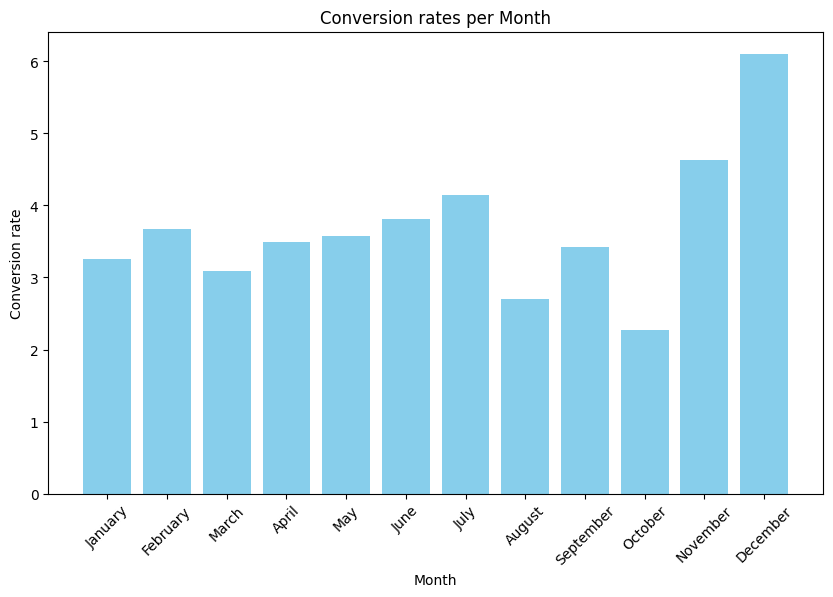

In [9]:
# Plotting the conversion rates per month using a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(grouped_df['Month'], grouped_df['Conversion rate'], color='skyblue')  # Bar plot for conversion rates by month
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Conversion rate')  # Label for the y-axis
plt.title('Conversion rates per Month')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


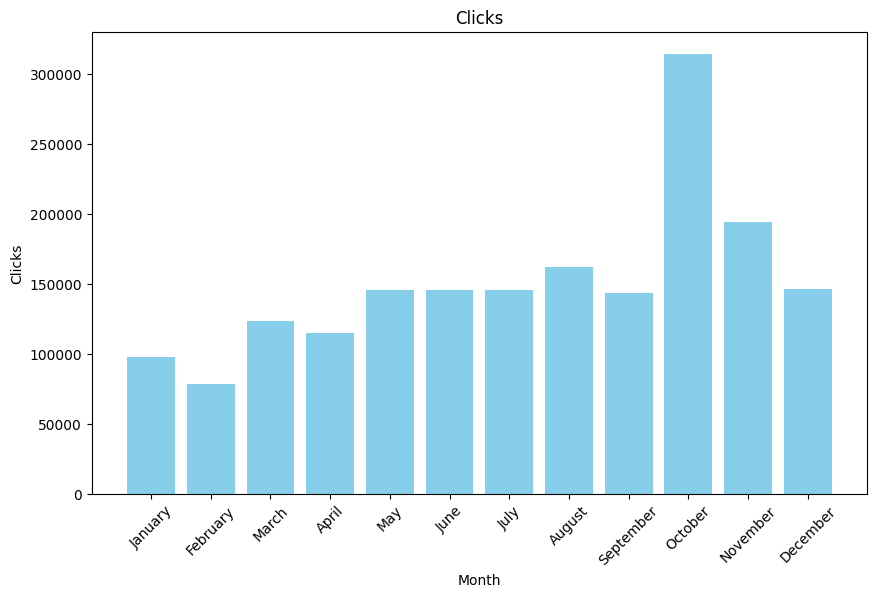

In [10]:
# Plotting the number of clicks per month using a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(grouped_df['Month'], grouped_df['Clicks'], color='skyblue')  # Bar plot for clicks by month
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Clicks')  # Label for the y-axis
plt.title('Clicks')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


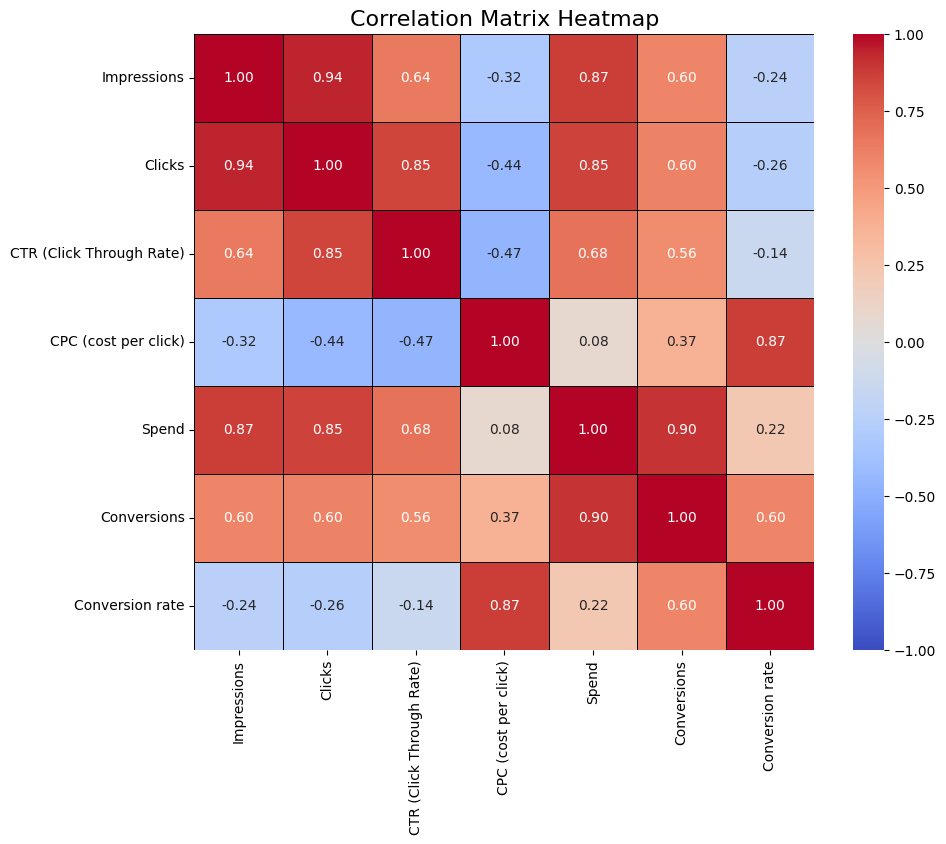

In [11]:
# Plotting the correlation matrix heatmap to visualize the relationships between numerical variables
correlation_matrix = grouped_df.drop('Month', axis=1).corr()  # Calculate the correlation matrix, excluding the 'Month' column

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Set the size of the figure

# Create the heatmap using seaborn
sns.heatmap(
    correlation_matrix,  # The correlation matrix
    annot=True,          # Annotate the heatmap with correlation values
    fmt=".2f",           # Format the annotations to 2 decimal places
    cmap="coolwarm",     # Color map (coolwarm is a good choice for correlations)
    vmin=-1,             # Minimum value for the color map
    vmax=1,              # Maximum value for the color map
    linewidths=0.5,      # Add lines between cells
    linecolor="black"    # Color of the lines
)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()  # Display the plot


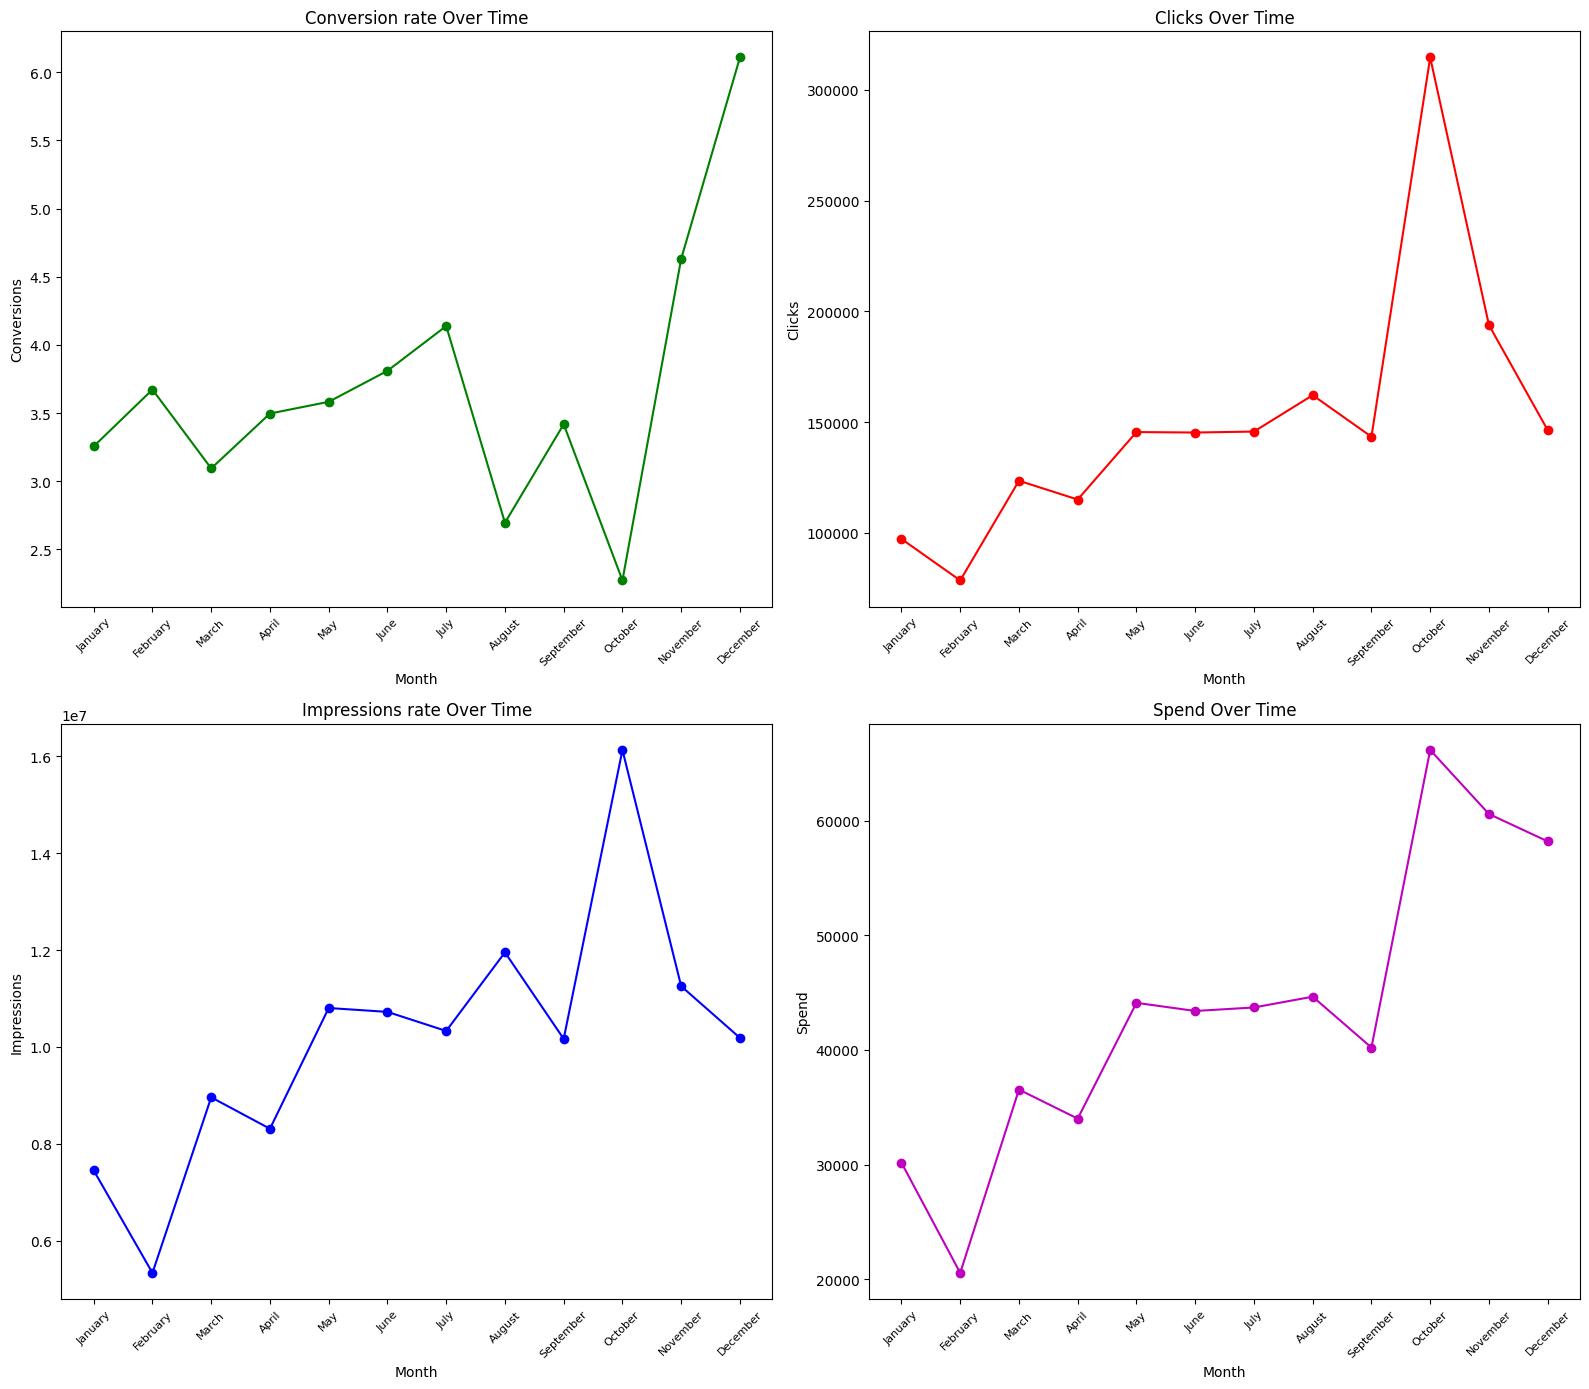

In [12]:
# Plotting multiple features over time (by month) to visualize trends and patterns
plt.figure(figsize=(16, 14))  # Set the size of the figure

# Plot Conversion rate over time
plt.subplot(2, 2, 1)  # Define position for the subplot
plt.plot(grouped_df['Month'], grouped_df['Conversion rate'], marker='o', color='g')  # Line plot for Conversion rate
plt.title('Conversion rate Over Time', fontsize=12)  # Title of the plot
plt.xlabel('Month', fontsize=10)  # x-axis label
plt.ylabel('Conversions', fontsize=10)  # y-axis label
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and adjust font size

# Plot Clicks over time
plt.subplot(2, 2, 2)  # Define position for the subplot
plt.plot(grouped_df['Month'], grouped_df['Clicks'], marker='o', color='r')  # Line plot for Clicks
plt.title('Clicks Over Time', fontsize=12)  # Title of the plot
plt.xlabel('Month', fontsize=10)  # x-axis label
plt.ylabel('Clicks', fontsize=10)  # y-axis label
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and adjust font size

# Plot Impressions over time
plt.subplot(2, 2, 3)  # Define position for the subplot
plt.plot(grouped_df['Month'], grouped_df['Impressions'], marker='o', color='b')  # Line plot for Impressions
plt.title('Impressions rate Over Time', fontsize=12)  # Title of the plot
plt.xlabel('Month', fontsize=10)  # x-axis label
plt.ylabel('Impressions', fontsize=10)  # y-axis label
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and adjust font size

# Plot Spend over time
plt.subplot(2, 2, 4)  # Define position for the subplot
plt.plot(grouped_df['Month'], grouped_df['Spend'], marker='o', color='m')  # Line plot for Spend
plt.title('Spend Over Time', fontsize=12)  # Title of the plot
plt.xlabel('Month', fontsize=10)  # x-axis label
plt.ylabel('Spend', fontsize=10)  # y-axis label
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and adjust font size

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()  # Display the plot


## Conclusion

Based on the charts and plots obtained from this analysis, the following insights can be drawn:

- In the last two months of the year, specifically November and December, there was a significant surge in the conversion rate, with the highest conversion rates achieved during these months. This suggests that the impact of the marketing campaign and the demand for these products peaked during the final months of the year. It can be concluded that for future marketing campaigns, focusing on these last two months of the year would likely yield better and more effective results.

- Additionally, it is noteworthy that in October, a large number of clicks were received, but they did not convert into customers, leading to a very low conversion rate. This indicates that the marketing campaign's performance was not successful in converting the large volume of clicks into actual customers, thus highlighting a potential area for improvement in that particular month.

Here are some key numerical insights from the data analysis:

- **Average Conversion Rate (annually):** 3.68%
- **Average Clicks (annually):** 150,958 clicks
- **Average CPC (Cost per Click, annually):** €0.295
- **Average Spend (annually):** €43,520
- **Average CTR (Click Through Rate, annually):** 1.46%
